In [64]:
import sys

sys.path.insert(1, 'C:/Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy/field_generator')
sys.path.insert(1, 'C:/Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy/utils')

import gaussian1D as g1
import matplotlib.pyplot as plt
import numpy as np
import cmpspec as cm

Generate a 1D field using FFT method.

In [65]:
def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 0.5)

n = 1000
field_1D = g1.gaussian1D(k41)

C:\Users\UROP\AppData\Local\Temp\ipykernel_11860\3488935848.py:16: RuntimeWarning: divide by zero encountered in power
  return k**-a
C:\Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy/field_generator\gaussian1D.py:142: RuntimeWarning: invalid value encountered in multiply
  F = W*np.sqrt(self.k_func(K)) # power spectra follows power law, so sqrt here.


Text(0, 0.5, 'noise')

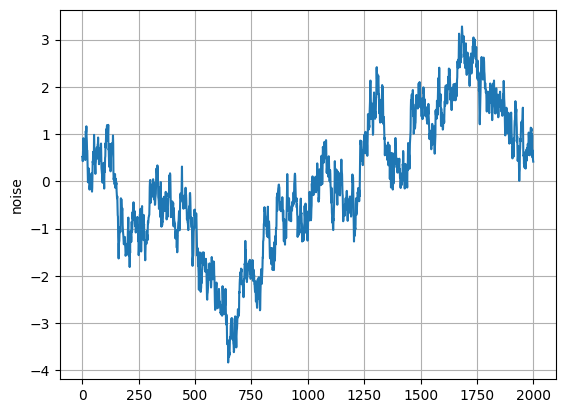

In [194]:
d = 1
sig = field_1D.fft(n)


plt.plot(sig)
plt.grid()
plt.ylabel('noise')

Calculate the Power Spectrum:

C:\Users\UROP\AppData\Local\Temp\ipykernel_11860\981145541.py:2: RuntimeWarning: divide by zero encountered in power
  return k**-a


0.0


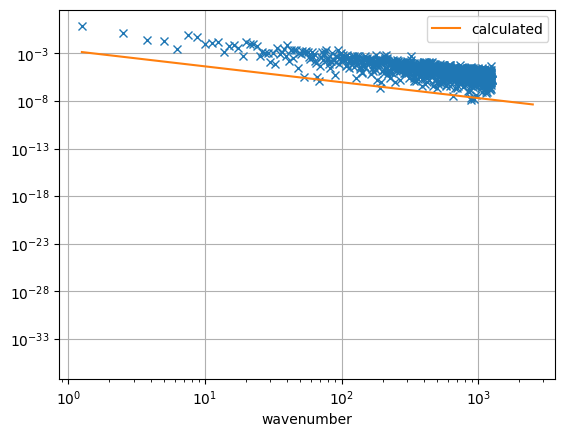

In [67]:


_, wn, ps = cm.compute1Dspectrum(sig, 5)
plt.plot(wn,ps, 'x')
plt.plot(wn, 0.002*k41(wn), label = 'calculated')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('wavenumber')

print(np.min(wn))



3D generation:

In [68]:
import gaussian3D as g3

field_3D = g3.gaussian3D(k41)
N = 100
sig = field_3D.fft(100)

C:\Users\UROP\AppData\Local\Temp\ipykernel_11860\981145541.py:2: RuntimeWarning: divide by zero encountered in power
  return k**-a
C:\Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy/field_generator\gaussian3D.py:202: RuntimeWarning: invalid value encountered in multiply
  F = W*np.sqrt(self.k_func(K)) # power spectra follows power law, so sqrt here.


plot data


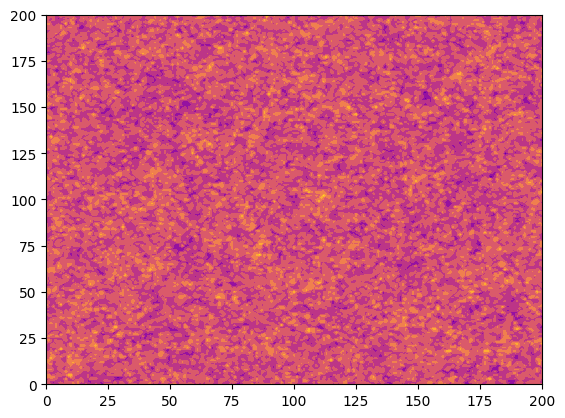

In [69]:
ax, fig = plt.subplots()
M = 2*N +1
X, Y = np.meshgrid(np.arange(0,201),np.arange(0,201))
cp = plt.contourf(X, Y, sig[:,:,1], cmap = 'plasma')


2D GEN AND SAVE TEST

In [70]:
import gaussian2D as g2

field_2D = g2.gaussian2D(k41)
N = 100
sig = field_2D.fft(100)

C:\Users\UROP\AppData\Local\Temp\ipykernel_11860\981145541.py:2: RuntimeWarning: divide by zero encountered in power
  return k**-a
C:\Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy/field_generator\gaussian2D.py:176: RuntimeWarning: invalid value encountered in multiply
  F = W*np.sqrt(self.k_func(K)) # power spectra follows power law, so sqrt here.


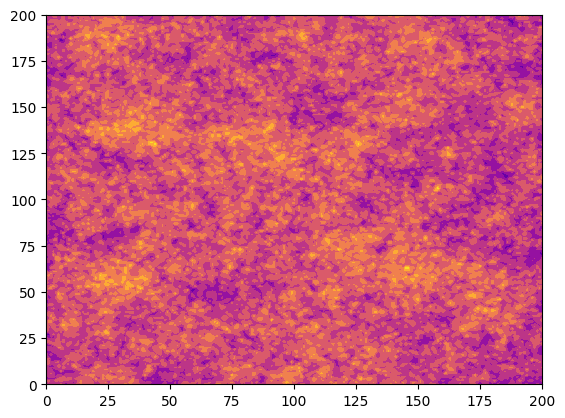

In [71]:
ax, fig = plt.subplots()
M = 2*N +1
X, Y = np.meshgrid(np.arange(0,201),np.arange(0,201))
cp = plt.contourf(X, Y, sig[:,:], cmap = 'plasma')

New FFT gen:

we are in!
[[Model]]
    <lmfit.ExpressionModel('c*x + a')>
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 100002
    # variables        = 2
    chi-square         = 3117418.30
    reduced chi-square = 31.1741830
    Akaike info crit   = 343967.908
    Bayesian info crit = 343986.933
    R-squared          = -inf
[[Variables]]
    c: -15.1551484 +/- 0.01766276 (0.12%) (init = -1.666667)
    a:  39.9435730 +/- 0.16617848 (0.42%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, a) = -0.9943


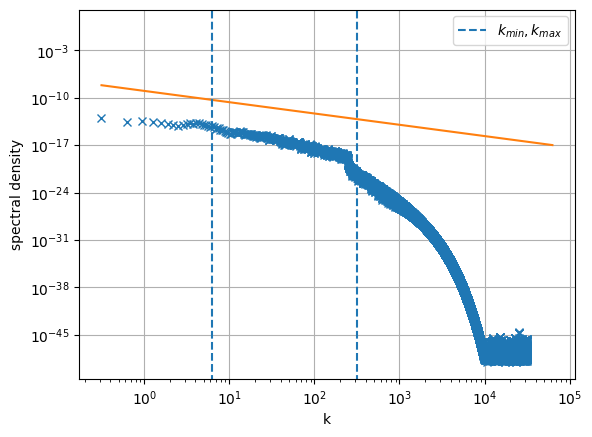

In [274]:
from importlib import reload
import new_fft_1D as f1
reload(f1)



l_max = 1

extent = 8

res = 100000

l_min = 2*np.pi/(10**2.5)
def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 5/3)


x, noise =f1.fft_1D(l_max, l_min, extent, res, k41)

# plt.plot(x, noise)
# plt.show()

import cmpspec as cm 

_, wn, ps = cm.compute1Dspectrum(noise, 20, 100)



plt.plot(wn, ps, 'x')




plt.xscale('log')
plt.yscale('log')



from lmfit.models import ExpressionModel
mod = ExpressionModel('c*x + a')
mod.make_params()
mod.set_param_hint('a', value = 1)
mod.set_param_hint('c', value = -5/3)
res0     =   mod.fit(np.array(np.log(ps)), x = np.log(wn), nan_policy='omit')
print(res0.fit_report())

# plt.plot(wn, np.exp(res0.best_fit), label = f"gradient = {np.round(-res0.params['c'].value, 2)}, ideal={np.round(5/3, 2)}")

plt.plot(wn, k41(wn)*10e-10)



plt.xlabel('k')
plt.ylabel('spectral density')
plt.vlines([2*np.pi/l_max, 2*np.pi/l_min], 0, 2500, linestyle = 'dashed', label = '$k_{min}, k_{max}$')
plt.grid()
plt.legend()
plt.show()